![image.png](https://i.imgur.com/a3uAqnb.png)

# Lab 1: Scikit-Learn Basics
In this lab, you will learn how to use **scikit-learn** to prepare data, train models, and evaluate their performance using a consistent workflow.

---




#🔍 **What is scikit-learn?**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1024px-Scikit_learn_logo_small.svg.png" width="20%">

**scikit-learn (sklearn)** is a Python library that provides simple and efficient tools for machine learning through APIs.
It is widely used for data preprocessing, training machine learning models, and evaluating their performance.

One of the main strengths of scikit-learn is its consistent and unified design, which makes it easy to learn and use.

---

#📊 **Data Representation**




<img src="https://media.licdn.com/dms/image/v2/D4D12AQEYdEPzSQtfqg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1708280037789?e=2147483647&v=beta&t=y7zwILcdtpHN47eGaq9V1bBXMNPXS31_SiLbobQkens" width="50%">



Scikit-learn is used for machine learning that works with **tabular data** represented as:

 ```Data (X) ```
- The **input data**
- **Rows = samples, columns = features**
- Typically shape ```(n_samples, n_features)```
- Can be **NumPy arrays** or **pandas DataFrames**

```Target/Label (y) ```
- The **output we want to predict**
- For standard single-target tasks: shape ```(n_samples,)```
- For **multi-output/multi-target** tasks: shape ```(n_samples, n_outputs)``` (or similar)
- For **unsupervised** tasks (e.g., clustering), ```y``` is often not provided ```(None)```



---

#🔁 **The scikit-learn API Pattern**
Most scikit-learn components follow the same workflow:

```Instantiate → Fit → Predict/Transform ```

- **Instantiate** : create the object and set its parameters
- **Fit**: learn from the data
- **Predict / Transform** : generate outputs from new data

This pattern applies to:

- **Transformer Classes** : modify or preprocess the input data (e.g., scalers, encoders)
- **Predictor Classes** : learn from data and generate predictions (e.g., classifiers, regressors)

Once you understand this pattern, you can work with almost any scikit-learn class.


---



## 📌 **Common Transformer Classes**

##🔹`sklearn.preprocessing`
`sklearn.preprocessing` provides tools for **preprocessing and transforming tabular data** before training machine learning models.

In [ ]:
# Random data generation for encoding
import pandas as pd

categories = pd.DataFrame({"Animal": ['cat', 'dog', 'cat', 'bird', 'dog']}) # DataFrame of one column

print("Before encoding:")
categories


Before encoding:


,Animal
0,cat
1,dog
2,cat
3,bird
4,dog


### 🔸 **OneHotEncoder**
`sklearn.preprocessing.OneHotEncoder` is a transformer used to **convert categorical features into binary (one-hot) vectors**.

Each category is represented by a separate column, with values of 0 or 1, ensuring that no artificial ordering is introduced.

**Main Functions:**
- **fit(X)**: learns the unique categories for each feature  
- **transform(X)**: converts categories into one-hot encoded vectors  
- **fit_transform(X)**: fits the encoder and transforms the data in one step

In [ ]:
from sklearn.preprocessing import OneHotEncoder #import OneHotEncoder

print('data before encoding:\n', categories) #show before encoding

onehot_encoder = OneHotEncoder(sparse_output=False) # Instantiate OneHotEncoder
data_onehot_encoded = onehot_encoder.fit_transform(categories) # Apply fit_transform to the copied

print('\nData after encoding:\n', data_onehot_encoded) #show after encoding

data before encoding:
   Animal
0    cat
1    dog
2    cat
3   bird
4    dog

Data after encoding:
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 🔸 **LabelEncoder**
`sklearn.preprocessing.LabelEncoder` is a transformer used to **convert categorical labels into numerical values** by assigning a unique integer to each category.

**Main Functions:**
- **fit(y)**: learns the unique categories from the target labels  
- **transform(y)**: converts categories into numerical labels  
- **fit_transform(y)**: fits the encoder and transforms the labels in one step

In [ ]:
from sklearn.preprocessing import LabelEncoder #import LabelEncoder

print('data before encoding:\n', categories) #show before encoding

label_encoder = LabelEncoder() # Instantiate LabelEncoder
data_label_encoded = label_encoder.fit_transform(categories["Animal"]) # Apply fit_transform to the column

print('\nData after encoding:\n', data_label_encoded) #show after encoding

data before encoding:
   Animal
0    cat
1    dog
2    cat
3   bird
4    dog

Data after encoding:
 [1 2 1 0 2]


### 🔸 **StandardScaler**
`sklearn.preprocessing.StandardScaler` is a transformer used to **standardize features** by removing the mean and scaling to unit variance.

**Main Functions:**
- **fit(X)**: computes the mean and standard deviation for each feature  
- **transform(X)**: scales the data using the learned statistics (for test data)
- **fit_transform(X)**: fits the scaler and transforms the data in one step (for train data)

In [ ]:
# Random data generation for scaling
data_for_scale = pd.DataFrame({"Feature_1": [11, 40, 19,12],"Feature_2": [2384, 439, 3282,576]})

print("Before scaling:")
data_for_scale


Before scaling:


,Feature_1,Feature_2
0,11,2384
1,40,439
2,19,3282
3,12,576


In [ ]:
from sklearn.preprocessing import StandardScaler #import StandardScaler

print('data before scaling:\n', data_for_scale) #show before scaling
standard_scaler = StandardScaler() # Instantiate StandardScaler
data_standard_scaled = standard_scaler.fit_transform(data_for_scale) # Apply fit_transform

print('\nData after scaling:\n', data_standard_scaled) #show after scaling

data before scaling:
    Feature_1  Feature_2
0         11       2384
1         40        439
2         19       3282
3         12        576

Data after scaling:
 [[-0.81387058  0.5916905 ]
 [ 1.67057645 -1.02069202]
 [-0.12850588  1.33612213]
 [-0.72819999 -0.90712061]]


### 🔸 **MinMaxScaler**
`sklearn.preprocessing.MinMaxScaler` is a transformer used to **scale features to a fixed range**, typically between 0 and 1.

**Main Functions:**
- **fit(X)**: computes the minimum and maximum value for each feature  
- **transform(X)**: scales the data to the specified range using the learned values (for test data)  
- **fit_transform(X)**: fits the scaler and transforms the data in one step (for train data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler

print('data before scaling:\n', data_for_scale) # show before scaling
minmax_scaler = MinMaxScaler() # Instantiate MinMaxScaler
data_minmax_scaled = minmax_scaler.fit_transform(data_for_scale) # Apply fit_transform to the copied

print('\nData after scaling:\n', data_minmax_scaled) # show after scaling

data before scaling:
    Feature_1  Feature_2
0         11       2384
1         40        439
2         19       3282
3         12        576

Data after scaling:
 [[0.         0.68413648]
 [1.         0.        ]
 [0.27586207 1.        ]
 [0.03448276 0.04818853]]




---


## 📌 **Data Splitting Strategies**


We can use `sklearn.model_selection` splitters to:
- Simulate **unseen (future) data**
- Evaluate model **generalization**
- Detect **overfitting**
- Avoid evaluating the model on data it has already seen


In [ ]:
import numpy as np # for random data generation

np.random.seed(42) # for reproducbility

X_reg = pd.DataFrame({"Feature_1": np.random.randn(500)}) # features
y_reg = 3 * X_reg["Feature_1"] + np.random.randn(500) * 0.5  # continous labels with noise


X_clf = pd.DataFrame({"Feature_1": np.random.randn(500)}) # features
y_clf = (X_clf["Feature_1"] > 0).astype(int) # labels as class 0 or 1


##  1️⃣  `train_test_split`

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250917175411543155/dataset.webp" width="60%">

`train_test_split` divides the dataset into two separate parts:
- **Training set**: used to train the model  
- **Test set**: used to evaluate the model on unseen data  

Common split ratios include:
- **80% training / 20% testing**
- **70% training / 30% testing**







In [ ]:
from sklearn.model_selection import train_test_split

# Use previously generated random data (example: classification data)
X, y = X_clf.copy(), y_clf.copy()

# split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for test, remaining 80% for train
    random_state=42,      # reproducible output
    shuffle=True,         # representative splits
    stratify=y            # preserve class distribution
)
# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 1)
X_test shape: (100, 1)
y_train shape: (400,)
y_test shape: (100,)


## 2️⃣ `KFold`

<img src="https://towardsdatascience.com/wp-content/uploads/2021/01/1AAwIlHM8TpAVe4l2FihNUQ.png" width="60%">


**K-Fold Cross Validation** splits the dataset into **K equal folds**.

- The model is trained on **K−1 folds**
- The remaining fold is used for testing
- This process is repeated **K times**
- Final performance is the **average** across all folds

K-Fold provides a more reliable evaluation, especially for **small datasets**.


In [ ]:
from sklearn.model_selection import KFold

# Use previously generated random data (example: regression data)
X, y = X_reg.copy(), y_reg.copy()

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    # indexing for each fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # print shapes
    print(f"Fold {fold}")
    print("  X_train shape:", X_train.shape)
    print("  X_test shape :", X_test.shape)
    print("  y_train shape:", y_train.shape)
    print("  y_test shape :", y_test.shape)
    print("-" * 30)

Fold 1
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
------------------------------
Fold 2
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
------------------------------
Fold 3
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
------------------------------
Fold 4
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
------------------------------
Fold 5
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
------------------------------


## 3️⃣ `StratifiedKFold`
<img src="https://dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png" width="50%">




**Stratified K-Fold** is a variation of K-Fold Cross Validation that **preserves the class distribution** in each fold.

- Each fold has the **same class proportions** as the original dataset
- important for **classification problems**
- Ensures fair and reliable evaluation when classes are imbalanced



In [ ]:
from sklearn.model_selection import StratifiedKFold

# Use previously generated random classification data
X, y = X_clf.copy(), y_clf.copy()

# Show full dataset class distribution
full_ratio = (y.value_counts(normalize=True) * 100).sort_index()
print("Full Dataset Class Distribution")
print("  y class percentages:", {k: f"{v:.2f}%" for k, v in full_ratio.items()})
print("-" * 40)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Stratified K-Fold Cross Validation\n" + "-"*40)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    # indexing for each fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Fold {fold}")
    print("  X_train shape:", X_train.shape)
    print("  X_test shape :", X_test.shape)
    print("  y_train shape:", y_train.shape)
    print("  y_test shape :", y_test.shape)

    # showing class distribution
    train_ratio = (y_train.value_counts(normalize=True) * 100).sort_index()
    test_ratio = (y_test.value_counts(normalize=True) * 100).sort_index()

    print("  y_train class percentages:", {k: f"{v:.2f}%" for k, v in train_ratio.items()})
    print("  y_test class percentages :", {k: f"{v:.2f}%" for k, v in test_ratio.items()})

    print("-" * 40)


Full Dataset Class Distribution
  y class percentages: {0: '45.20%', 1: '54.80%'}
----------------------------------------
Stratified K-Fold Cross Validation
----------------------------------------
Fold 1
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
  y_train class percentages: {0: '45.25%', 1: '54.75%'}
  y_test class percentages : {0: '45.00%', 1: '55.00%'}
----------------------------------------
Fold 2
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
  y_train class percentages: {0: '45.25%', 1: '54.75%'}
  y_test class percentages : {0: '45.00%', 1: '55.00%'}
----------------------------------------
Fold 3
  X_train shape: (400, 1)
  X_test shape : (100, 1)
  y_train shape: (400,)
  y_test shape : (100,)
  y_train class percentages: {0: '45.25%', 1: '54.75%'}
  y_test class percentages : {0: '45.00%', 1: '55.00%'}
----------------------------------------
Fold 4
  X_train shap



---


## 📌 **Common Predictor Classes**
scikit-learn organizes machine learning models by **model families**, such as linear models, tree-based models, ensemble models, neighbors-based models, and support vector machines (SVM).


## 1️⃣ `sklearn.linear_model`

`sklearn.linear_model` provides **linear models** for regression and classification tasks.

Predictor classes in `sklearn.linear_model` share the following common functions:
- **fit(X, y)**: learns the model parameters from the training data  
- **predict(X)**: generates class labels or continuous predictions  
- **predict_proba(X)**: returns the predicted probability for each class (classification only)


### 🔹 **Linear Regression**


In [ ]:
# Import base linear model for regression (Linear Regression)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use previously generated random regression data
X, y = X_reg.copy(), y_reg.copy()

# split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

model = LinearRegression()          # instantiate
model.fit(X_train, y_train)         # fit
y_pred = model.predict(X_test)      # predict

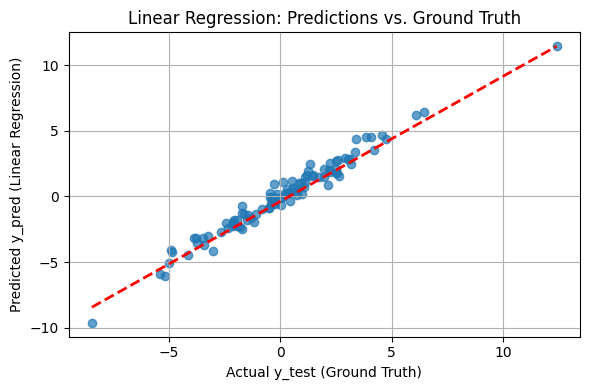

In [ ]:
# Plot for Linear Regression Predictions vs. Ground Truth
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_pred)], 'r--', linewidth=2)
plt.xlabel("Actual y_test (Ground Truth)")
plt.ylabel("Predicted y_pred (Linear Regression)")
plt.title("Linear Regression: Predictions vs. Ground Truth")
plt.grid(True)

plt.tight_layout()
plt.show()

### 🔹 **Logistic Regression**


In [ ]:
# Import base linear model for classification (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Use previously generated random classification data
X, y = X_clf.copy(), y_clf.copy()

# split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for test, remaining 80% for train
    random_state=42,      # reproducible output
    shuffle=True,         # representative splits
    stratify=y            # preserve class distribution
)

model = LogisticRegression()     # instantiate
model.fit(X_train, y_train)      # fit
y_pred = model.predict(X_test)   # predict


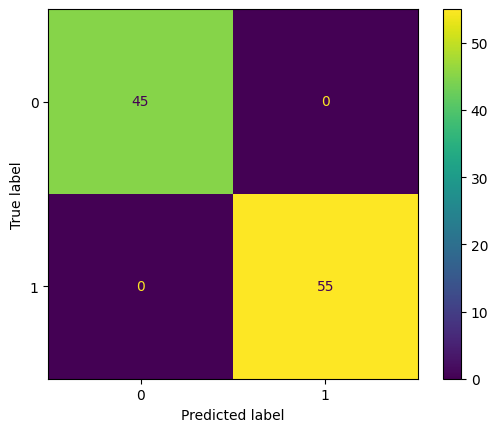

In [ ]:
# lets use confusion matrix to visualize the predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

## 2️⃣ `sklearn.tree`

`sklearn.tree` provides **tree-based models** for regression and classification tasks. They can model **non-linear relationships** and work well with tabular data.

Predictor classes in `sklearn.tree` share the following common functions:
- **fit(X, y)**: learns decision rules from the training data  
- **predict(X)**: generates class labels or continuous predictions  
- **predict_proba(X)**: returns the predicted probability for each class (classification only)



### 🔹 **DecisionTreeRegressor**


In [ ]:
# Import tree-based model for regression (Decision Tree Regressor)
from sklearn.tree import DecisionTreeRegressor

# Use previously generated random regression data
X, y = X_reg.copy(), y_reg.copy()

# Split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)  # instantiate
model.fit(X_train, y_train)                     # fit
y_pred = model.predict(X_test)                  # predict


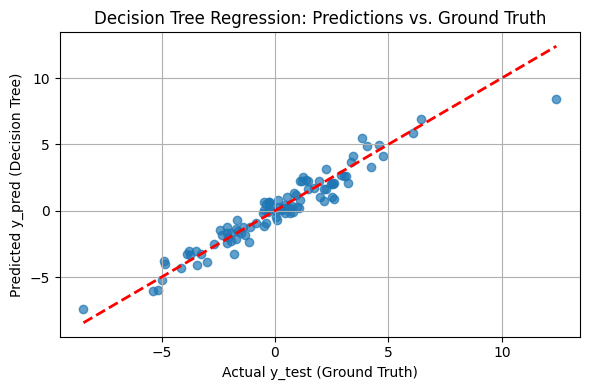

In [ ]:
# Plot for Decision Tree Regression Predictions vs. Ground Truth
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         'r--', linewidth=2)

plt.xlabel("Actual y_test (Ground Truth)")
plt.ylabel("Predicted y_pred (Decision Tree)")
plt.title("Decision Tree Regression: Predictions vs. Ground Truth")
plt.grid(True)

plt.tight_layout()
plt.show()

### 🔹 **DecisionTreeClassifier**


In [ ]:
# Import tree-based model for classification (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier

# Use previously generated random classification data
X, y = X_clf.copy(), y_clf.copy()

# Split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42) # instantiate
model.fit(X_train, y_train)                     # fit
y_pred = model.predict(X_test)                  # predict

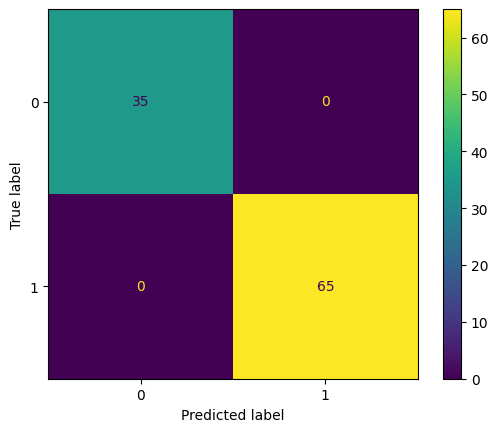

In [ ]:
# lets use confusion matrix to visualize the predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()



---


## 📌 **Evaluation Metrics**



`sklearn.metrics` provides tools used to **measure how well a model performs** on unseen data.

- Metrics compare the model’s predictions with the true labels  
- They help determine whether the model has **learned useful patterns**  
- Different tasks require different metrics:
  - **Regression** → MSE, MAE, RMSE
  - **Classification** → Accuracy, Percision, Recall, F1 Score

Choosing the correct metric is essential for proper model evaluation.


### 🔹 **Regression Metrics**


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Regression Metrics\n" + "-"*30)

# Use previously generated random classification data
X, y = X_reg.copy(), y_reg.copy()

# Split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

# Train a regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)

Regression Metrics
------------------------------
MSE : 0.2724531844231776
MAE : 0.4079602988629547
RMSE: 0.5219704823293915


### 🔹 **Classification Metrics**


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nClassification Metrics\n" + "-"*30)

# Use previously generated random classification data
X, y = X_clf.copy(), y_clf.copy()

# Split ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

# Train a classification model
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)



Classification Metrics
------------------------------
Accuracy : 0.99
Precision: 1.0
Recall   : 0.9846153846153847
F1 Score : 0.9922480620155039


The **classification report** provides a detailed evaluation of a classification model. It summarizes key metrics: Precision, Recall, F1 Score, and support

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report\n" + "-"*30)
print(report)

Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# **Now You Know the Core scikit-learn Classes and Functions**🚀


## Applying scikit-learn on a Real Dataset:  Academic Performance Prediction 📊

In this task, we use a simulated student lifestyle dataset to predict **final exam scores** based on daily habits such as study time, sleep, social media usage, and mental health 🧠📱


Dataset link: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance


100%|██████████| 19.1k/19.1k [00:00<00:00, 6.23MB/s]

Extracting files...

Dataset Shapes
X: (1000, 15)
y: (1000,)



Model Evaluation Metrics (K-Fold)
----------------------------------------
MSE : 29.23
MAE : 4.29
RMSE: 5.41
----------------------------------------


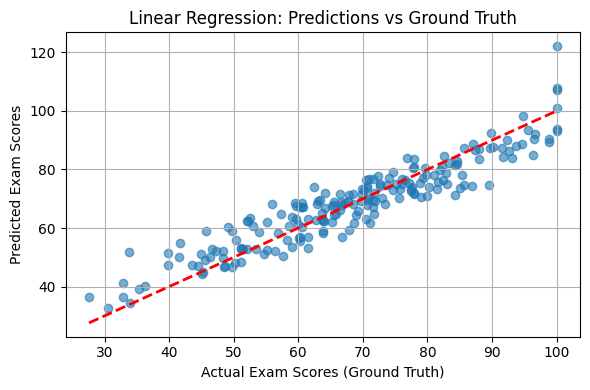

In [ ]:

# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Download dataset from Kaggle
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

# Load CSV file
df = pd.read_csv(f"{path}/student_habits_performance.csv")

# Separate Features and Target
target_column = "exam_score"

X = df.drop(target_column, axis=1)
y = df[target_column]

print("\nDataset Shapes")
print("X:", X.shape)
print("y:", y.shape)

# Encode Categorical Features
label_encoder = LabelEncoder()

for col in X.select_dtypes(include=["object"]).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Model
model = LinearRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))


# Print Evaluation Metrics
print("\nModel Evaluation Metrics (K-Fold)\n" + "-"*40)
print(f"MSE : {np.mean(mse_scores):.2f}")
print(f"MAE : {np.mean(mae_scores):.2f}")
print(f"RMSE: {np.sqrt(np.mean(mse_scores)):.2f}")
print("-"*40)

# Plot Predictions vs Ground Truth
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    linewidth=2
)

plt.xlabel("Actual Exam Scores (Ground Truth)")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression: Predictions vs Ground Truth")
plt.grid(True)

plt.tight_layout()
plt.show()



For more detailed documentation and examples, visit the official **scikit-learn documentation**:  
https://scikit-learn.org/




<img src="https://i.imgflip.com/agevqk.jpg" width="25%">

### **Contributed by: Yara Alzahrani**